# Baseball Case Study Project
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### Importing necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [2]:
df_bb = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df_bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


#### -- Dataset Attributes --
1.	W - This indicates the number of Wins credited to a pitcher.
2.	R - This indicates Runs scored.
3.	AB - This means At bat or time at bat.
4.	H - This means Hit.
5.	2B - This means a double. This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire.
6.	3B - This means a Triple.It's is the act of a batter safely reaching third base after hitting the ball.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. 
8.	BB - This means Base on balls (also called a "walk"). 
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. 
10.	SB - This means Stolen base. 
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). 
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

Output: Number of predicted wins (W)


### Exploratory Data Analysis(EDA)

In [3]:
#checking the dimension of the dataset
df_bb.shape

(30, 17)

This dataset contains 30 rows and 17 columns.

In [4]:
#getting the information from the dataset
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
#Checking the types of columns
df_bb.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

We can see there are 2 different types of data (int and folat) present in the dataset.

In [6]:
# checking for the missing values
df_bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see there are no missing values present in the dataset.

In [7]:
#Checking unique values of each columns
df_bb.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

from above we can see the number of unique values in each column.

In [8]:
#Checking value counts of target column
df_bb['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

Here we can see there are no missing values or spaces in the target column.

### Statistical analysis of the dataset

In [9]:
#summary of the dataset
df_bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above we can observe the following points.
The counts of all the columns are same i.e,30 which means there are no missing values present in it.
we observe that there is quite difference between the 75% and max of E column,so there may be outliers present in it.  
Lets investigate further in visualiztaion.

### Visualization

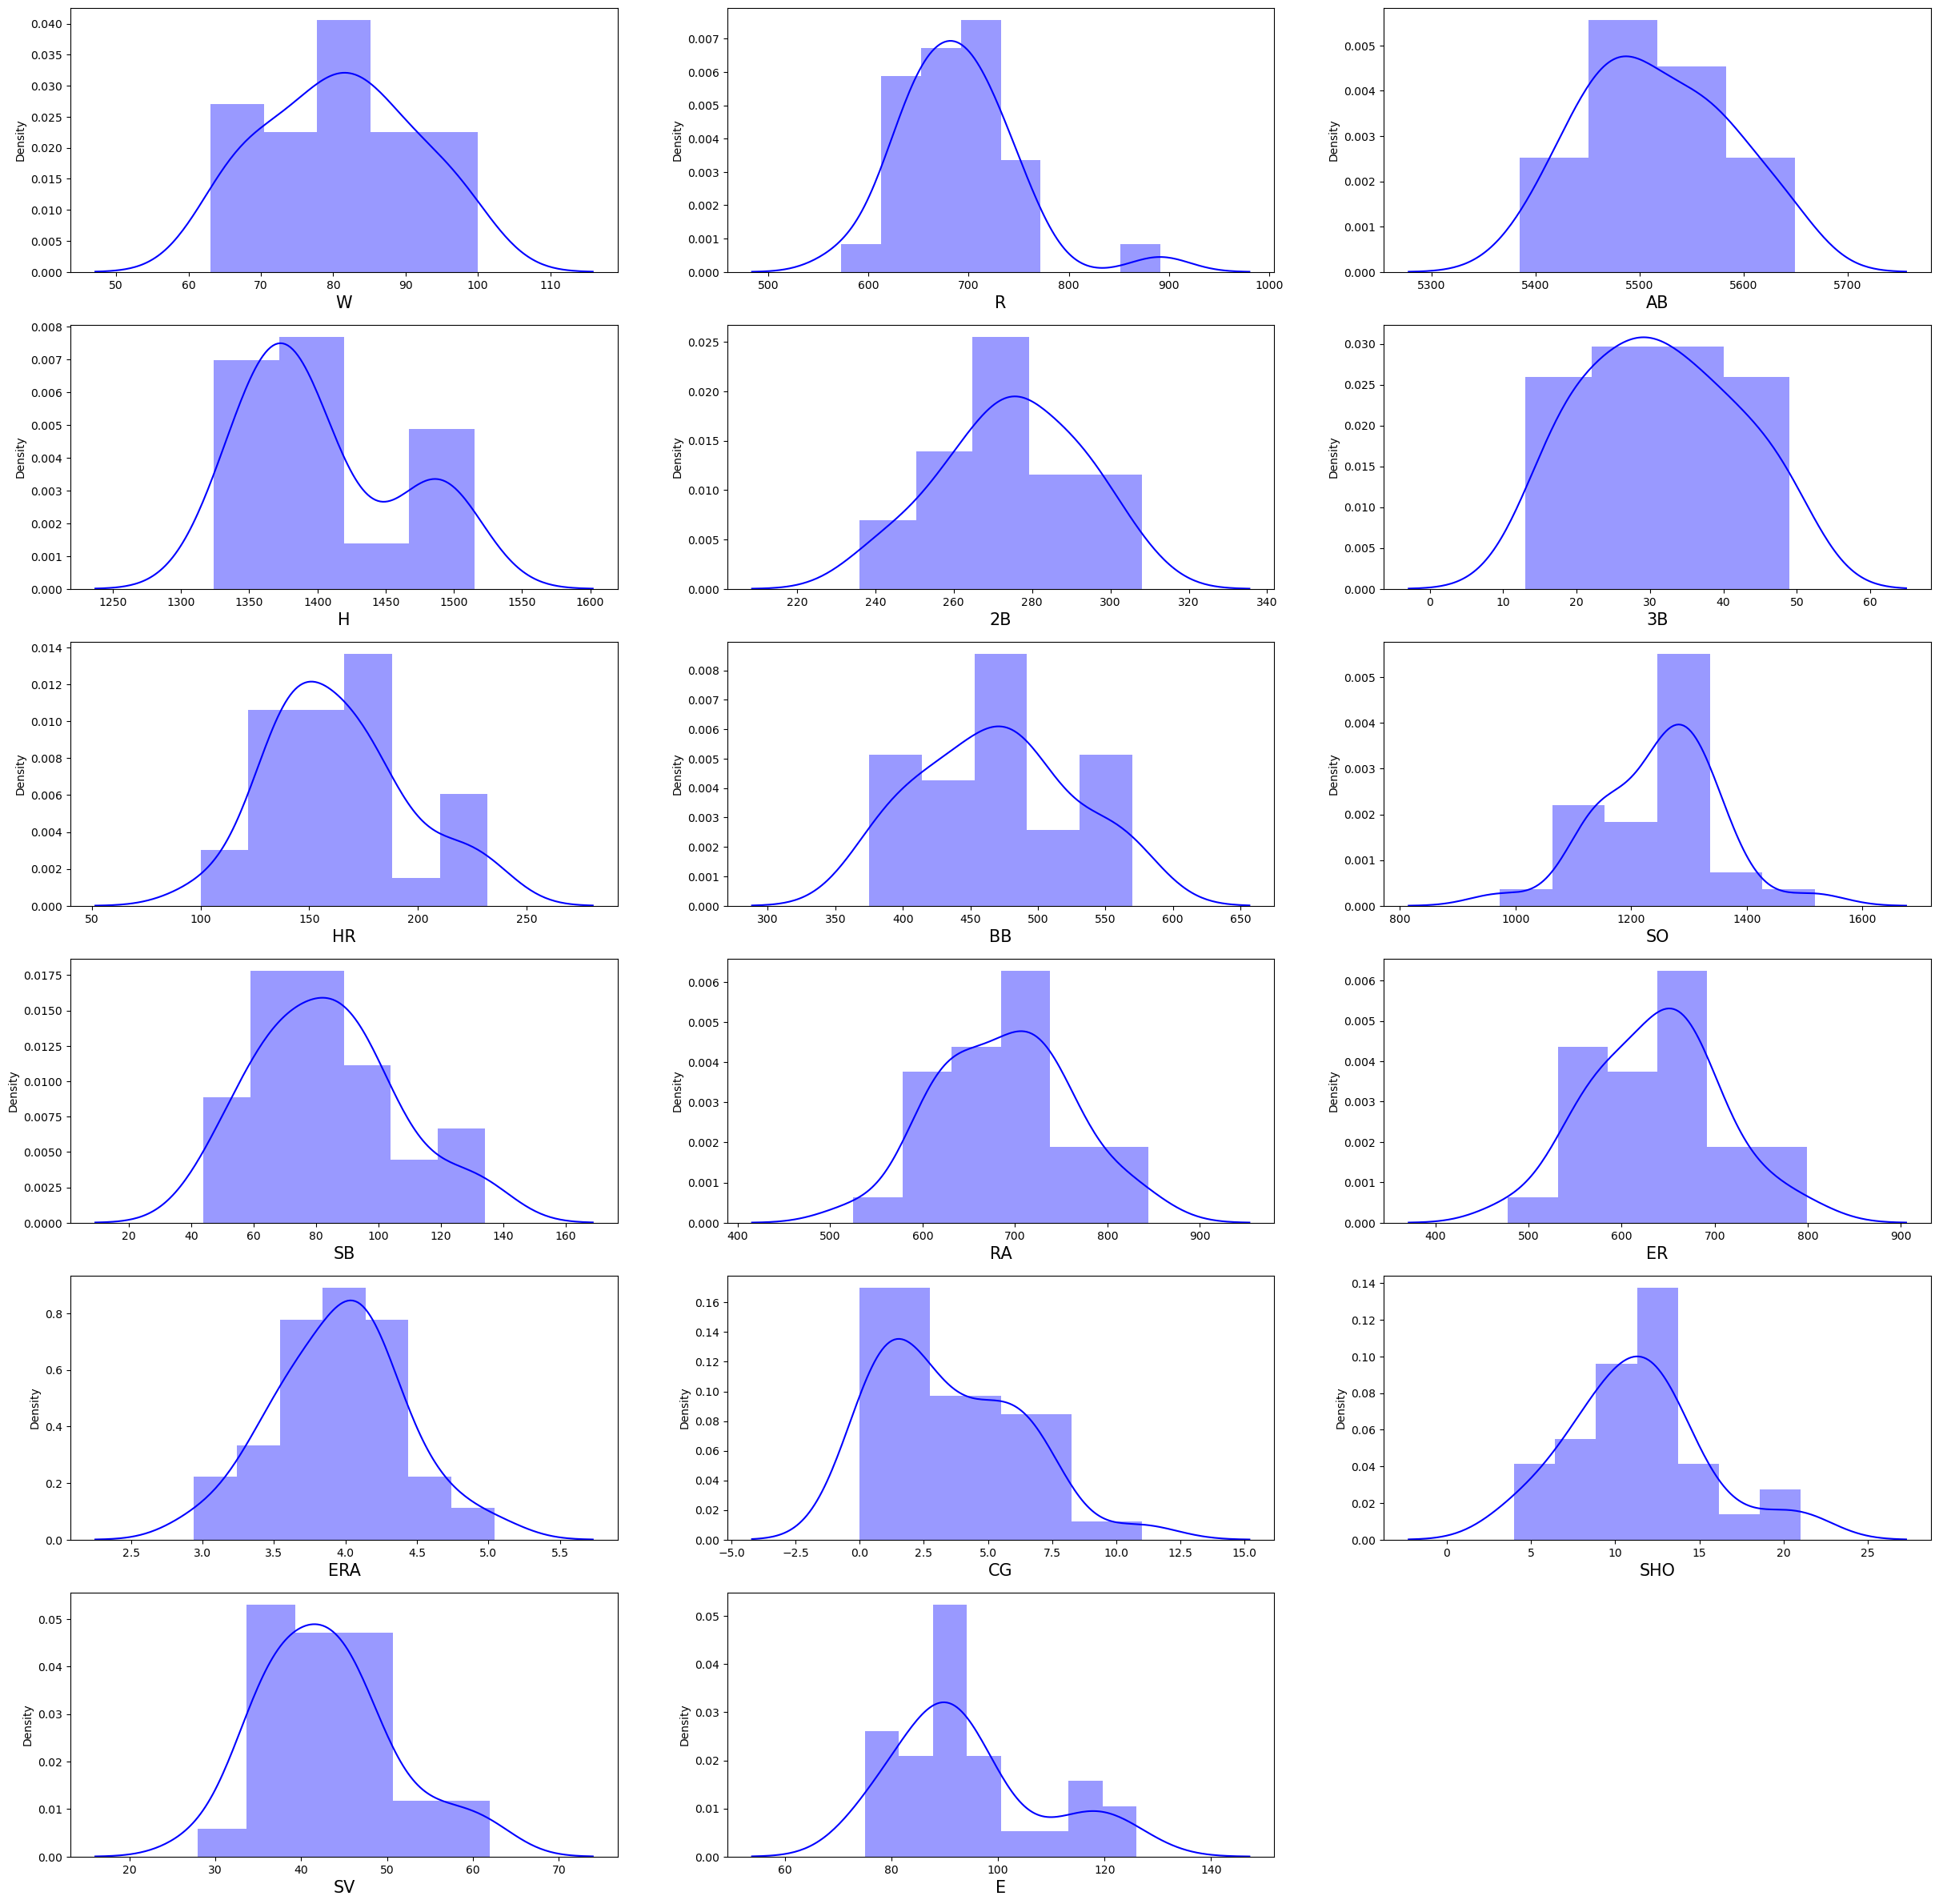

In [10]:
#visualization of data distribution for numerical column
plt.figure(figsize=(30,30),facecolor='white')
plotnumber=1
for column in df_bb:
    if plotnumber <= 17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df_bb[column],color='b')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From the above distribution plots, we can see that the data looks like normally distributed(showing bell shaped curve) for all the columns.Some columns looking slightly skewed but i am keeping as it is, as our dataset size is quite small.

### Correlation using Heatmap

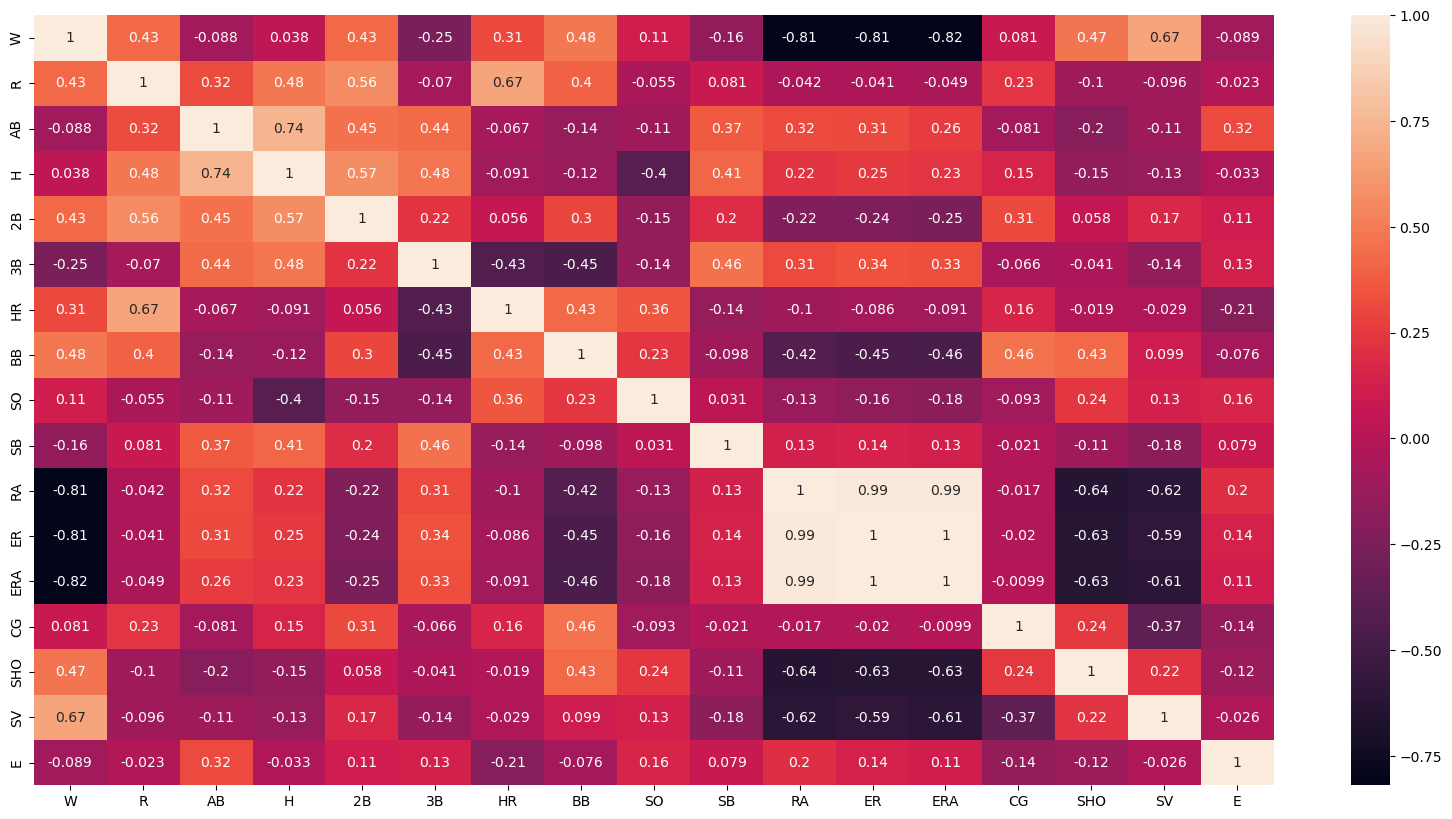

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_bb.corr(), annot = True)
plt.show()

From above correlation matrix, we can see the positive as well as negative correlations between the label and other features.
We can observe the following points.  
-The label(W) is positively correlated with the columns R,H,2B,HR,BB,SO,CG,SHO and SV.  
-The label(W) is negatively correlated with the columns AB,3B,SB,RA,ER,ERA and E.  
-The columns RA,ER,ERA columns are seems to be highly correlated with each other.  

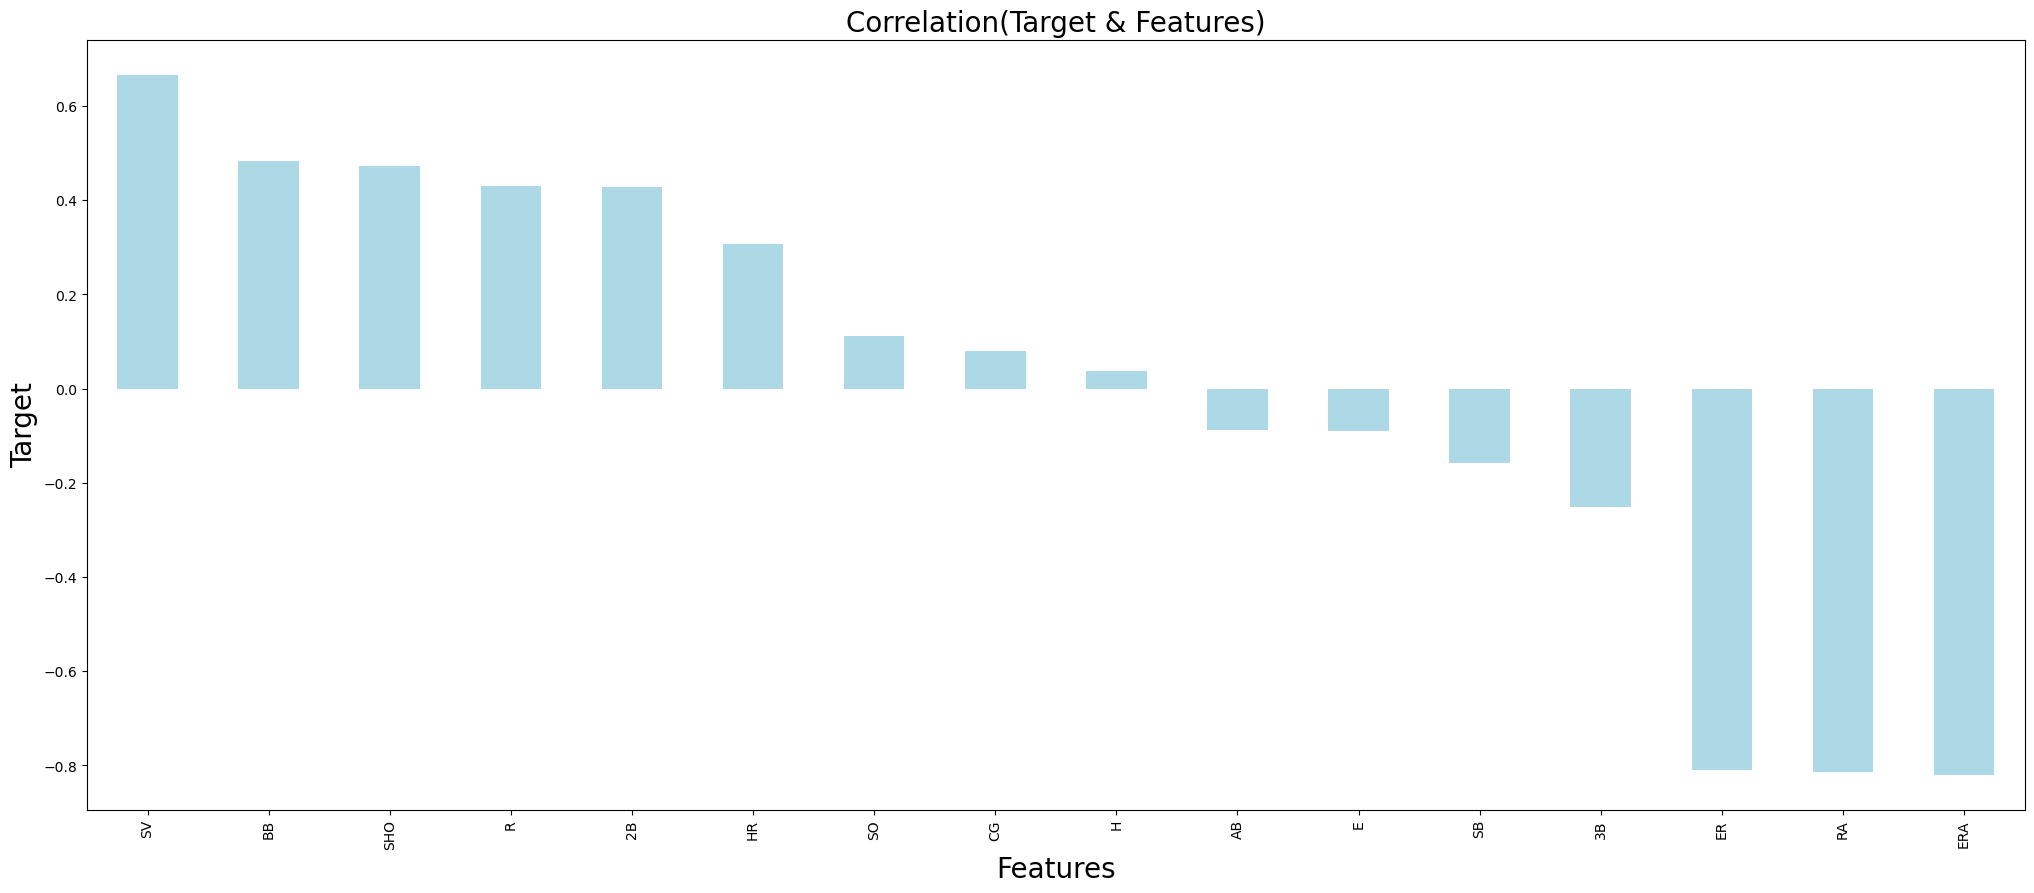

In [12]:
# visualization in plots
plt.figure(figsize =(25, 10))
df_bb.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='lightblue')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation(Target & Features)',fontsize=20)
plt.show()

from the above plot, We can observe the positive and negative correlated features with the target.

### Separating the features and target

In [13]:
x = df_bb.drop(['W'],axis=1)  #Features
y = df_bb['W']   #Target

### Visualizing the relationship of features with the label/target.

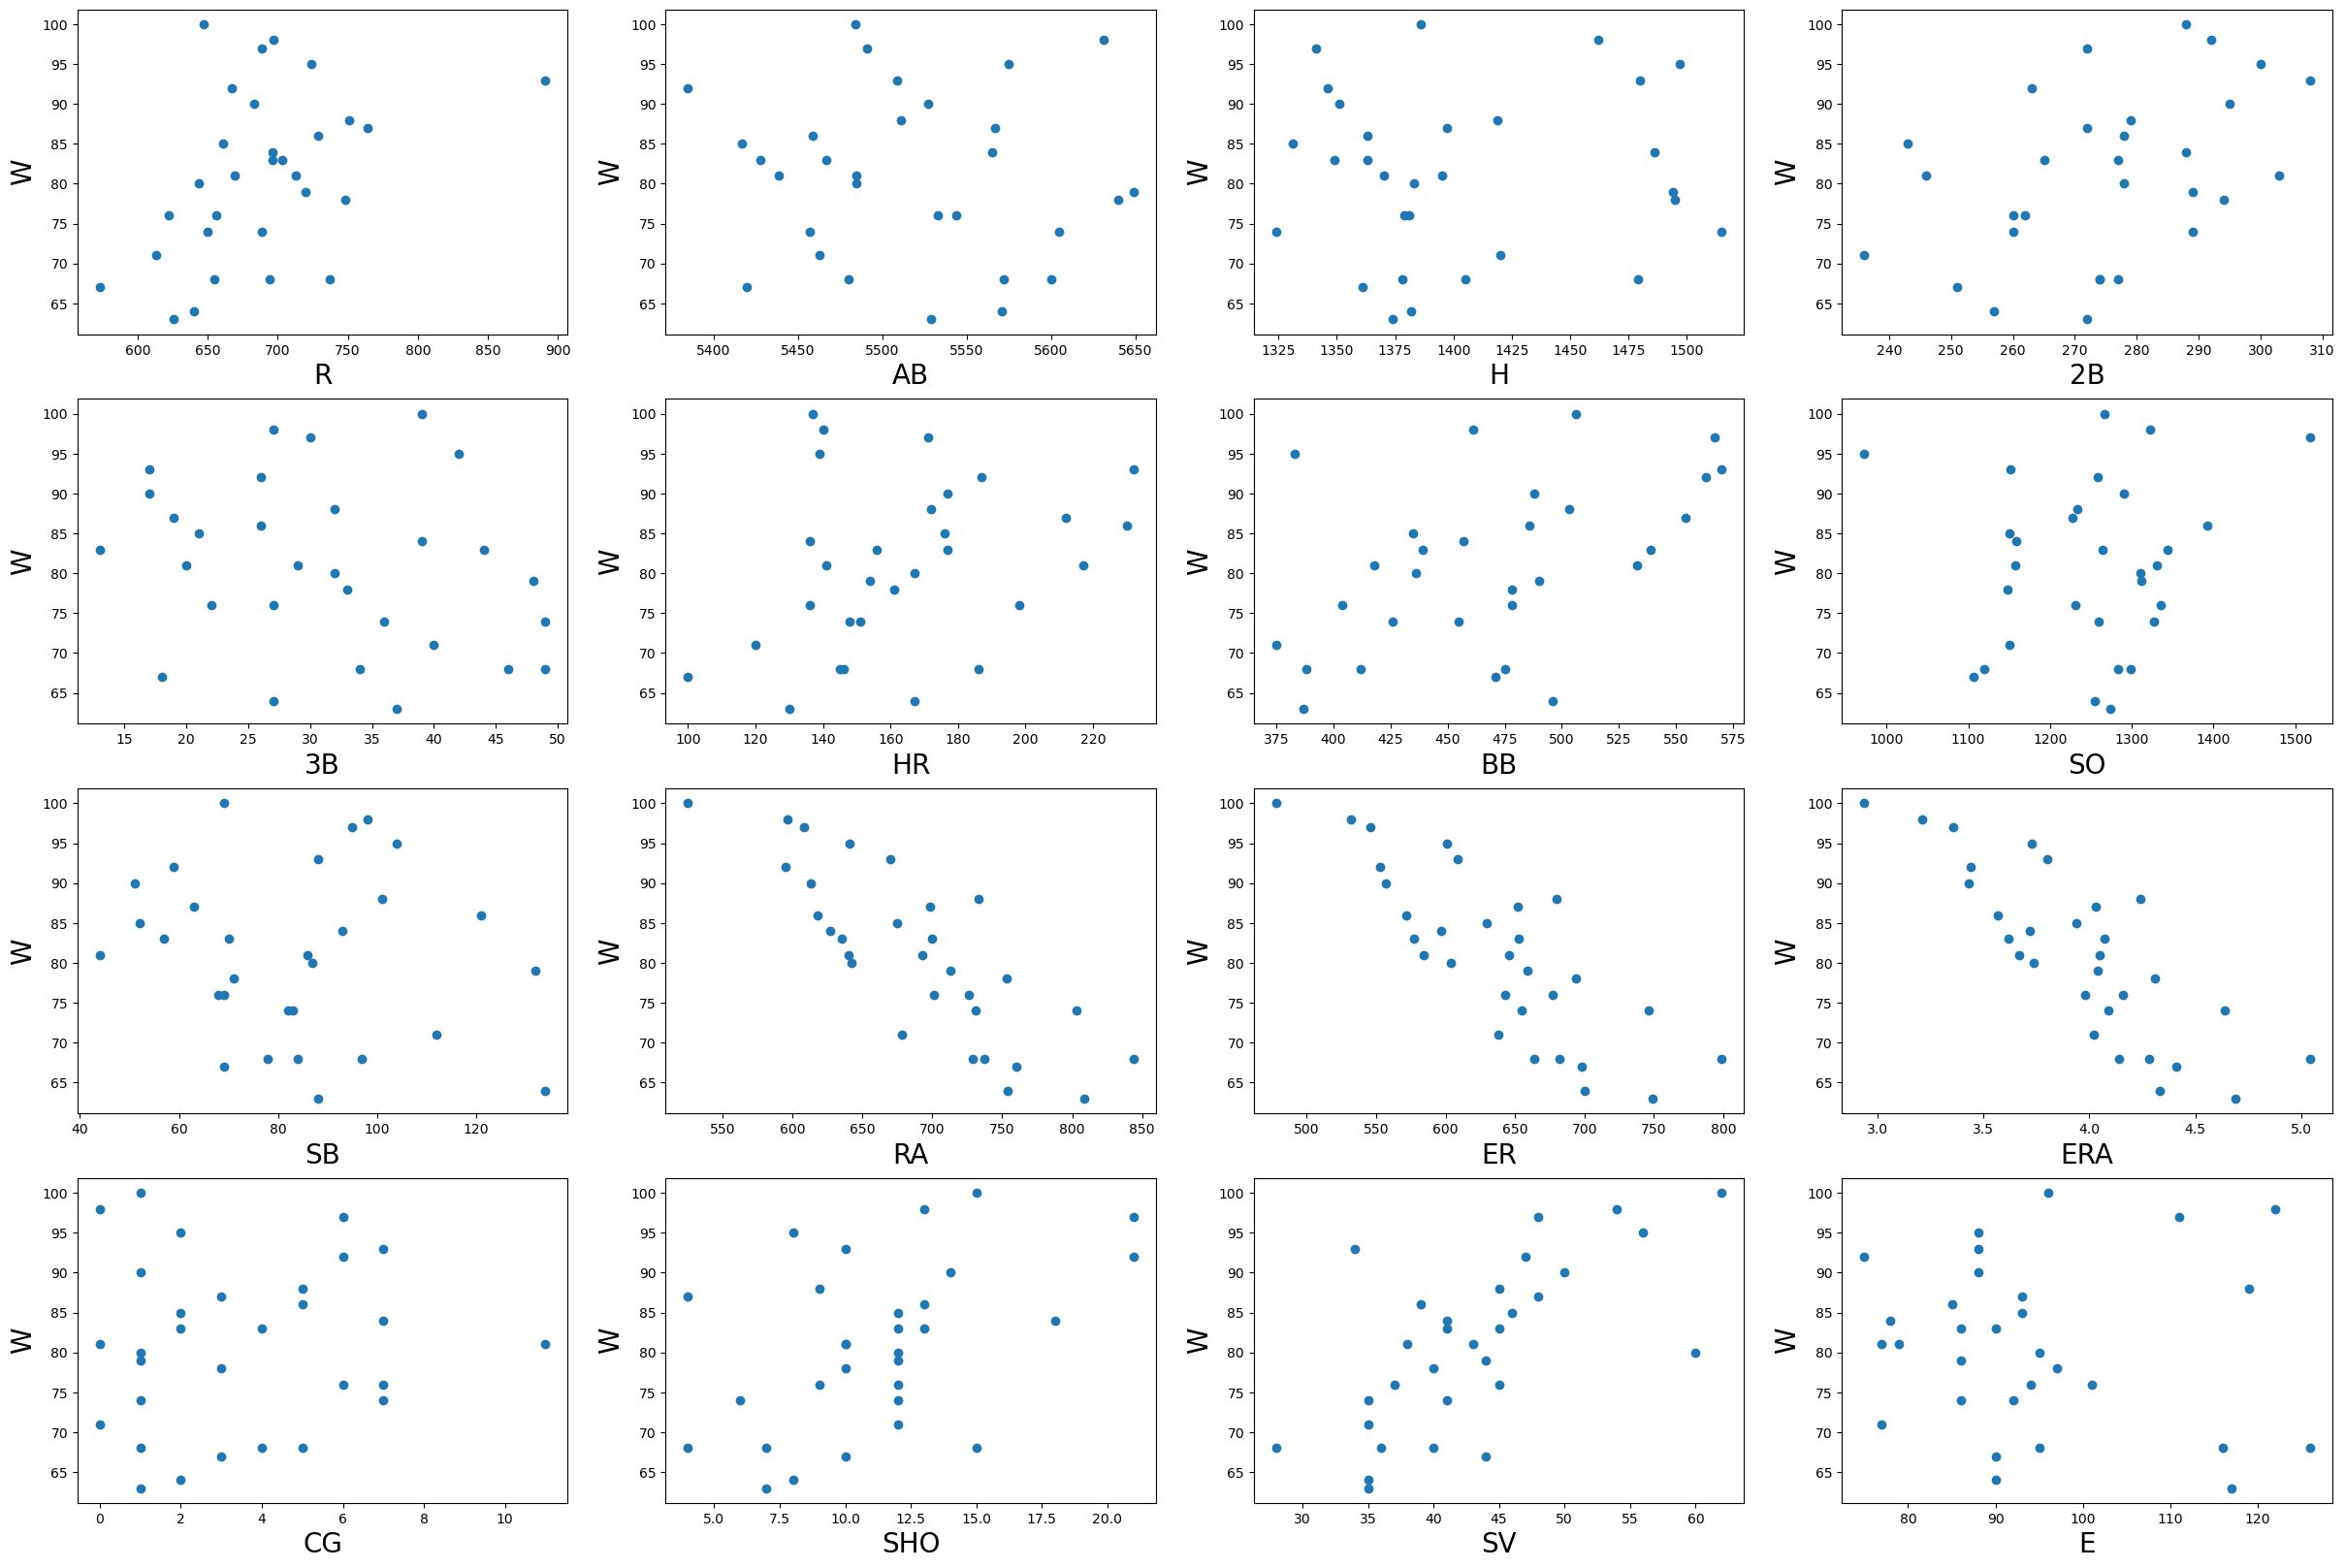

In [14]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <= 16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber+=1
plt.show()

From the above plot it seems like all have some kind of relation with the label.

### Data Scaling using Standard Scaler

In [15]:
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [16]:
x1.shape[1]

16

In [17]:
x1.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197


### Checking VIF(variance Inflation Factor) for multicolinearity issue

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


Here we can see RA,ER and ERA have very high vif values means they are highly correlated with the other features.We will drop one of the column first,if the same issue exist,then we will remove the next column having high vif.

In [19]:
#Dropping ER column
x1 = x1.drop(["ER"],axis=1)

In [20]:
x1.shape

(30, 15)

In [21]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,11.158733,R
1,5.863764,AB
2,9.628749,H
3,3.786446,2B
4,3.293109,3B
5,9.057309,HR
6,3.791451,BB
7,2.607389,SO
8,1.849280,SB
9,122.133235,RA


From the above we can see RA and ERA still have higher vif values.

In [22]:
#Dropping RA column
x1 = x1.drop(["RA"],axis=1)

In [23]:
x1.shape

(30, 14)

In [24]:
#Again checking vif value for multicilinearity issue
vif=pd.DataFrame()
vif["vif_values"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["Features"]=x1.columns
vif

,vif_values,Features
0,10.987898,R
1,4.399954,AB
2,8.941874,H
3,3.729413,2B
4,3.142717,3B
5,7.882841,HR
6,3.468244,BB
7,2.155496,SO
8,1.819823,SB
9,4.951981,ERA


Now we can see the multicolinearity is resolved.

### Splitting the data into Train and Test Set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

Here using the 80% data for the training set and 20% data for the testing set.

## Model Building(Regression)

### Linear Regression

In [26]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [27]:
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
# Model Evaluation
y_pred=model1.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :97%
R2 score(Testing Accuracy) :77%
MAE(Mean absolute Error) : 3.95
MSE(Mean Squared Error) : 29.97
RMSE(Root Mean squared Error) : 1.99


### Decision Tree Regressor

In [33]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model2.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :7%
MAE(Mean absolute Error) : 9.67
MSE(Mean Squared Error) : 122.33
RMSE(Root Mean squared Error) : 3.11


### Random Forest Regressor

In [42]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model3.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :92%
R2 score(Testing Accuracy) :47%
MAE(Mean absolute Error) : 6.95
MSE(Mean Squared Error) : 70.20
RMSE(Root Mean squared Error) : 2.64


### GradientBoostingRegressor

In [45]:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)

GradientBoostingRegressor()

In [46]:
print('R2 Score(Training Accuracy) :'+ str(round(model4.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model4.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model4.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :60%
MAE(Mean absolute Error) : 6.48
MSE(Mean Squared Error) : 52.05
RMSE(Root Mean squared Error) : 2.54


### AdaBoostRegressor

In [47]:
model5 = AdaBoostRegressor()
model5.fit(x_train, y_train)

AdaBoostRegressor()

In [48]:
print('R2 Score(Training Accuracy) :'+ str(round(model5.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model5.score(x_test, y_test)*100))+'%')

# Model Evaluation
y_pred=model5.predict(x_test)
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :98%
R2 score(Testing Accuracy) :52%
MAE(Mean absolute Error) : 7.49
MSE(Mean Squared Error) : 63.60
RMSE(Root Mean squared Error) : 2.74


#### As the difference between training and testing score is minimum in LinearRegressoion so choosing it as our final model. 

### Hyper Parameter Tuning

As Linear Regression doesn't have any hyper parameter.So hyperparameter tuning is not possible here.

#### Saving the model

In [61]:
import joblib
joblib.dump(model1,"baseball_analysis.pkl")

['baseball_analysis.pkl']

Finally saved the best regression model for baseball case study Project analysis and our model is ready for use.